In [689]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [690]:
# DATA EXPLORATION

dataframe = pd.read_csv('music_dataset_mod.csv')
dataframe.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [691]:
data = dataframe.copy()

In [692]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [693]:
data.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [694]:
unique_genres = data['Genre'].unique()
unique_genres

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of Genres')

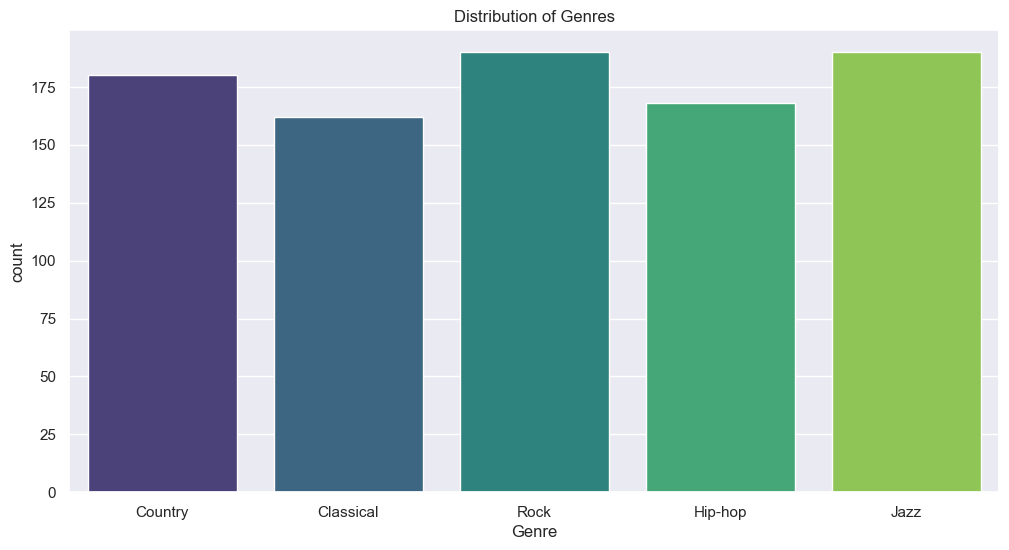

In [695]:
plt.figure(figsize = (12,6))
genre_distribution = sns.countplot( x = 'Genre' , data = data , palette= 'viridis')
plt.title('Distribution of Genres')


In [696]:
#Correlation Analysis

data_cleaned = data.dropna(subset='Genre')
data_cleaned.isnull().sum()

Tempo                          0
Dynamics Range                 0
Vocal Presence                 0
Percussion Strength            0
String Instrument Detection    0
Electronic Element Presence    0
Rhythm Complexity              0
Drums Influence                0
Distorted Guitar               0
Metal Frequencies              0
Ambient Sound Influence        0
Instrumental Overlaps          0
Genre                          0
dtype: int64

In [697]:
X = data_cleaned.drop('Genre' , axis=1)
y = data_cleaned['Genre']

In [698]:
label_encoder  = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [699]:
data_encoded = data_cleaned.copy()

In [700]:
data_encoded['Genre'] = y_encoded

In [701]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    int32  
dtypes: float64(12), int32(1)


In [702]:
correlation_matrix = data_encoded.corr()
correlation_matrix

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


Text(0.5, 1.0, 'Correlation Matrix')

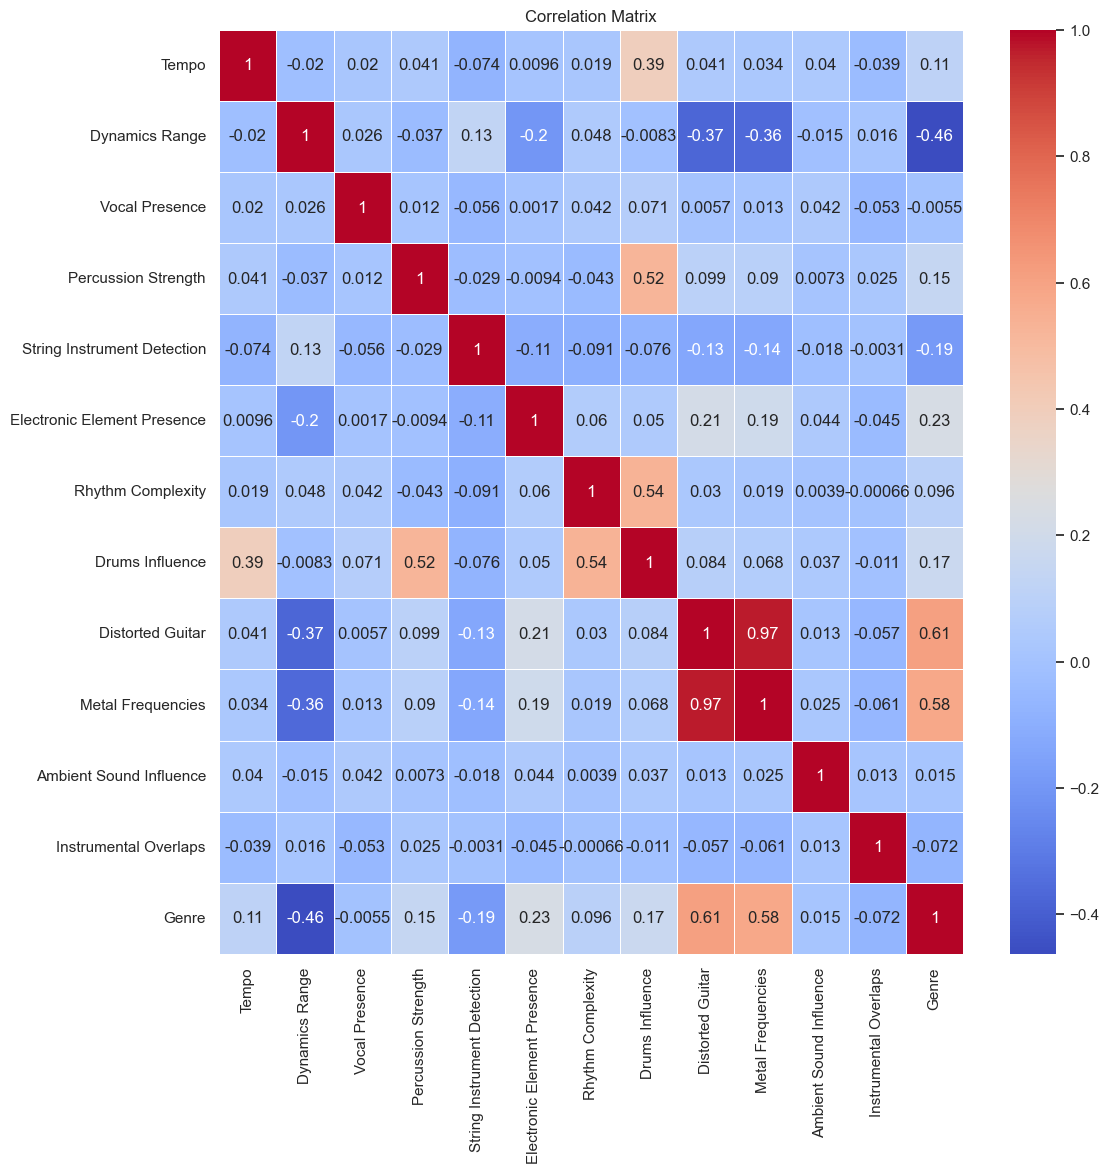

In [703]:
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix , annot=True, cmap = 'coolwarm', linewidths= 0.5)
plt.title('Correlation Matrix')

In [704]:
#PCA for Dimensionality Reduction

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_standardized)

[[-0.32276419  0.63236264  0.05320844 ...  0.76493507  1.53633887
   0.16037718]
 [-0.21834523  1.26791613  1.52189513 ... -1.4654764  -1.15313543
  -1.16143819]
 [ 0.37404526  0.35132812  0.48306804 ...  1.26039216  1.49165303
  -0.81044425]
 ...
 [ 0.03876913  0.26524849 -0.61672579 ...  1.51998929 -1.55523377
   0.8709389 ]
 [-1.2146319  -1.52681996  0.37815922 ...  0.24787354 -1.00171631
  -0.83061884]
 [-2.53711957 -0.76059346  0.38551088 ... -0.07983057  1.23101564
   0.9959692 ]]


In [705]:
pca = PCA(n_components=8)
pca.fit(X_scaled)
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 8,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [706]:
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[-1.0572597   0.28161626  0.62342202 ...  1.05439349  0.24994853
  -0.27158679]
 [ 1.86454175  2.72389526 -0.06110915 ...  1.34651169  1.06142384
   0.17034065]
 [-1.86197335  0.0390771   0.30639382 ...  0.29362059  0.66875032
   0.49138804]
 ...
 [-0.41959195 -2.19097097  1.57481878 ... -0.10027041  0.47496282
  -1.95550656]
 [-0.59721268 -2.33887467 -0.91433944 ...  0.13583326  0.02134544
   0.88701971]
 [ 0.33474784 -0.75956161  0.16804437 ...  2.28079533 -1.54104915
   1.21769653]]


In [707]:
explained_variance_ratio = pca.explained_variance_ratio_

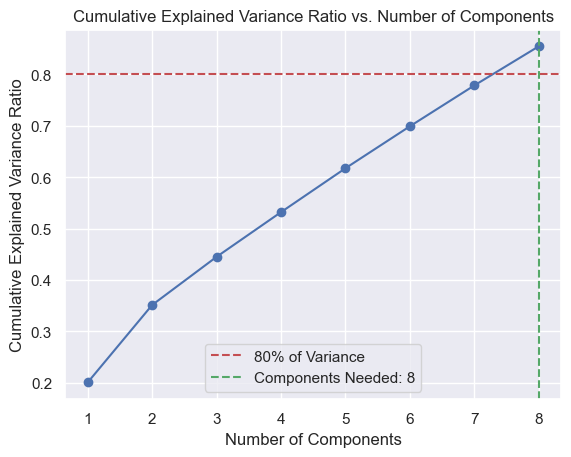

In [708]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components needed to capture at least 80% of variance
components_needed = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# Plotting
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% of Variance')
plt.axvline(x=components_needed, color='g', linestyle='--', label=f'Components Needed: {components_needed}')

# Adding labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.legend()

# Display the plot
plt.show()



In [709]:
X_pca

array([[-1.0572597 ,  0.28161626,  0.62342202, ...,  1.05439349,
         0.24994853, -0.27158679],
       [ 1.86454175,  2.72389526, -0.06110915, ...,  1.34651169,
         1.06142384,  0.17034065],
       [-1.86197335,  0.0390771 ,  0.30639382, ...,  0.29362059,
         0.66875032,  0.49138804],
       ...,
       [-0.41959195, -2.19097097,  1.57481878, ..., -0.10027041,
         0.47496282, -1.95550656],
       [-0.59721268, -2.33887467, -0.91433944, ...,  0.13583326,
         0.02134544,  0.88701971],
       [ 0.33474784, -0.75956161,  0.16804437, ...,  2.28079533,
        -1.54104915,  1.21769653]])

In [710]:
train_X , test_X = train_test_split(X_pca, test_size=0.3, random_state=42)
train_y , test_y = train_test_split(y_encoded , test_size=0.3, random_state=42)

In [711]:
train_X , test_X

(array([[-2.75009849,  1.86533892,  0.10966446, ...,  0.58608915,
         -0.12693722, -0.56751341],
        [ 0.53638061,  4.02348268,  0.0808081 , ...,  0.51673951,
          0.11656888, -0.04047335],
        [-1.07631675,  1.49724789, -1.862132  , ..., -0.45393484,
         -0.03674567,  0.2257322 ],
        ...,
        [-0.98752486,  1.11540268,  0.59425513, ..., -1.66495839,
         -1.07443475, -0.7432561 ],
        [ 1.04653923, -1.9187722 , -1.17058881, ..., -0.20705388,
         -1.03950885,  1.02917202],
        [-1.19426265, -0.87247658, -1.08567919, ...,  0.62354512,
         -1.49070445, -1.38155135]]),
 array([[-2.20775027, -0.14108754, -0.38679848, ...,  0.34763865,
         -1.47212051, -0.40619111],
        [-0.55403059,  1.66645463,  0.07617542, ...,  1.21380082,
         -0.15089896, -0.27116955],
        [ 2.95822743,  0.73703342, -0.42247231, ..., -1.37498032,
         -1.35561407, -1.9080159 ],
        ...,
        [-1.88966613,  1.34523441,  0.04852163, ...,  

In [712]:
test_X.shape[0]


267

In [713]:
# Train the model

Logistic_regression_model = LogisticRegression(max_iter=10000)

Logistic_regression_model.fit(train_X , train_y)
Logistic_regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [714]:
# Prediction

y_pred = Logistic_regression_model.predict(test_X)
y_pred

array([4, 3, 0, 0, 0, 3, 3, 4, 1, 3, 4, 2, 2, 4, 0, 0, 0, 0, 1, 1, 0, 4,
       0, 0, 3, 3, 2, 0, 1, 1, 1, 3, 1, 4, 1, 4, 4, 4, 2, 3, 3, 3, 2, 4,
       0, 0, 4, 4, 0, 2, 0, 4, 0, 4, 1, 1, 3, 3, 3, 3, 2, 0, 1, 2, 3, 4,
       0, 4, 4, 4, 2, 4, 4, 1, 2, 3, 3, 1, 0, 4, 2, 4, 0, 1, 0, 2, 4, 3,
       3, 0, 2, 4, 3, 1, 0, 1, 4, 4, 4, 1, 1, 3, 2, 1, 4, 2, 2, 4, 4, 2,
       1, 0, 2, 3, 4, 3, 2, 3, 3, 3, 3, 0, 3, 0, 4, 4, 2, 0, 1, 2, 3, 3,
       1, 1, 0, 3, 0, 4, 0, 4, 2, 0, 0, 0, 2, 0, 0, 2, 3, 0, 3, 4, 3, 2,
       1, 4, 3, 2, 1, 1, 4, 3, 2, 1, 4, 2, 2, 0, 1, 4, 3, 0, 3, 4, 0, 3,
       0, 0, 0, 1, 3, 4, 1, 3, 3, 2, 2, 4, 3, 3, 4, 0, 4, 4, 4, 3, 0, 2,
       3, 4, 4, 2, 0, 4, 2, 0, 0, 0, 1, 3, 3, 3, 3, 2, 3, 3, 4, 1, 4, 0,
       4, 0, 3, 2, 0, 3, 2, 4, 4, 2, 3, 4, 4, 3, 0, 1, 3, 4, 4, 1, 4, 0,
       3, 1, 2, 4, 1, 3, 2, 3, 4, 3, 4, 0, 4, 3, 0, 1, 4, 4, 4, 2, 1, 0,
       2, 2, 3])

In [715]:
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5355805243445693


In [716]:
report = classification_report(test_y, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [717]:
train_X , test_X = train_test_split(X_standardized, test_size=0.3, random_state=42)

In [718]:


# Assuming you have X_scaled and y_encoded (original scaled features and encoded target)

# Split the original data into training and test sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_standardized, y_encoded, test_size=0.3, random_state=42)

# Create a Logistic Regression model
logistic_regression_model_original = LogisticRegression(max_iter=10000)

# Fit the model to the original training data
logistic_regression_model_original.fit(X_train_original, y_train_original)

# Predict the target values for the original test set
y_pred_original = logistic_regression_model_original.predict(X_test_original)

# Evaluate accuracy for the original model
accuracy_original = accuracy_score(y_test_original, y_pred_original)
print("Accuracy (Original Data):", accuracy_original)

# Generate a classification report for the original model
report_original = classification_report(y_test_original, y_pred_original)
print("Classification Report (Original Data):\n", report_original)


Accuracy (Original Data): 0.5280898876404494
Classification Report (Original Data):
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



In [719]:
unknown_genre_data = data[data['Genre'].isnull()]
unknown_genre_data_without_genre = unknown_genre_data.drop(columns=['Genre'], axis=1)
unknown_genre_data_without_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399
...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283


In [720]:
# Assuming you have already trained logistic_regression_model_original
predicted_genres = logistic_regression_model_original.predict(unknown_genre_data_without_genre)


C:\Users\91898\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [721]:
# Assuming you used LabelEncoder to encode genres during training
original_labels = label_encoder.inverse_transform(predicted_genres)


In [722]:
data.loc[data['Genre'].isnull(), 'Genre'] = original_labels



In [725]:
print(data.head(993))

          Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0    114.618354       57.976367       53.251766            99.061840   
1    116.672803       69.387087       95.787280            90.831033   
2    128.328121       52.930677       65.701187           104.439247   
3    128.511337       25.494755       14.095374            40.106130   
4    135.474190       45.174876      101.469872            70.002203   
..          ...             ...             ...                  ...   
988  134.326266       12.643692        2.354950            12.446691   
989  132.866227       42.235387       85.929323           109.565586   
990  145.665597       28.642070       52.657254             7.204516   
991  130.719110       65.990957       21.775950            91.817048   
992  117.892313       35.001524       76.506358            77.972570   

     String Instrument Detection  Electronic Element Presence  \
0                      14.686768                    17.628630   
1    